In [1]:
import cv2
import os

In [ ]:
os.mkdir("Rock")
os.mkdir("Scissor")
os.mkdir("Paper")

In [75]:
Rock_data = []

In [76]:
cap = cv2.VideoCapture(0)

count = 1

while(True):
    
    ret, frame = cap.read()
    if ret == False:
        continue
    
    cv2.rectangle(frame,(50,100),(274,324),(255,0,0),2)
    cv2.rectangle(frame,(400,100),(624,324),(0,255,0),2)
    
    # Images for the model
    if count%5 == 0:
        f1 = frame[100:324, 400:624]
        f2 = frame[100:324, 50:274]
        Rock_data.append(f1)
        Rock_data.append(f2)
        
    count += 1
    
    frame = cv2.resize(frame, (1000, 700))
    frame = cv2.flip(frame,1)
    
    if count == 510:
        break
        
    cv2.imshow("Rock Paper Scissors", frame)
    
    key_pressed = cv2.waitKey(1) & 0xFF
    
    if key_pressed == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [77]:
import matplotlib.pyplot as plt
import numpy as np

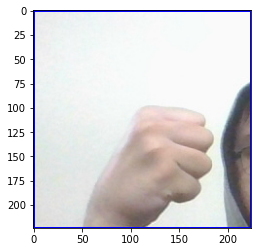

In [79]:
sample = cv2.cvtColor(Rock_data[-1], cv2.COLOR_BGR2RGB)
plt.imshow(sample)

In [80]:
Paper_data = []

In [81]:
cap = cv2.VideoCapture(0)

count = 1

while(True):
    
    ret, frame = cap.read()
    if ret == False:
        continue
    
    cv2.rectangle(frame,(50,100),(274,324),(255,0,0),2)
    cv2.rectangle(frame,(400,100),(624,324),(0,255,0),2)
    
    # Images for the model
    if count%5 == 0:
        f1 = frame[100:324, 400:624]
        f2 = frame[100:324, 50:274]
        Paper_data.append(f1)
        Paper_data.append(f2)
        
    count += 1
    
    frame = cv2.resize(frame, (1000, 700))
    frame = cv2.flip(frame,1)
    
    if count == 510:
        break
        
    cv2.imshow("Rock Paper Scissors", frame)
    
    key_pressed = cv2.waitKey(1) & 0xFF
    
    if key_pressed == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

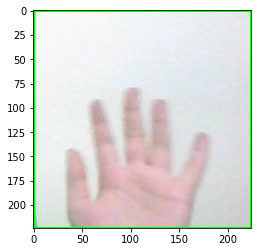

In [84]:
sample = cv2.cvtColor(Paper_data[44], cv2.COLOR_BGR2RGB)
plt.imshow(sample)

In [85]:
Sci_data = []

In [89]:
cap = cv2.VideoCapture(0)

count = 1

while(True):
    
    ret, frame = cap.read()
    if ret == False:
        continue
    
    cv2.rectangle(frame,(50,100),(274,324),(255,0,0),2)
    cv2.rectangle(frame,(400,100),(624,324),(0,255,0),2)
    
    # Images for the model
    if count%5 == 0:
        f1 = frame[100:324, 400:624]
        f2 = frame[100:324, 50:274]
        Sci_data.append(f1)
        Sci_data.append(f2)
        
    count += 1
    
    frame = cv2.resize(frame, (1000, 700))
    frame = cv2.flip(frame,1)
    
    if count == 510:
        break
        
    cv2.imshow("Rock Paper Scissors", frame)
    
    key_pressed = cv2.waitKey(1) & 0xFF
    
    if key_pressed == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

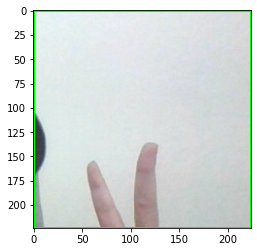

In [96]:
sample = cv2.cvtColor(Sci_data[30], cv2.COLOR_BGR2RGB)
plt.imshow(sample)

In [97]:
X_data = []
labels = []
for i in range(len(Rock_data)):
    X_data.append(Rock_data[i])
    labels.append("Rock")
    
for i in range(len(Paper_data)):
    X_data.append(Paper_data[i])
    labels.append("Paper")
    
for i in range(len(Sci_data)):
    X_data.append(Sci_data[i])
    labels.append("Scissor")

In [98]:
len(X_data), len(labels)

(808, 808)

In [ ]:
# One hot encoded labels
from keras.utils import np_utils
labels_dict = {
    "Paper" : 0,
    "Rock" : 1,
    "Scissor" : 2
}
for idx,label in enumerate(labels):
    labels[idx] = labels_dict[label]
Y_train = np_utils.to_categorical(labels)
Y_train.shape
X_train = np.array(X_data)

In [120]:
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model

In [127]:
model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

In [128]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256, activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(3, activation='softmax')(d1)

In [129]:
model_new = Model(inputs= model.input, outputs = fc2)

In [130]:
# FINE TUNING the model
for ix in range(169):

    model_new.layers[ix].trainable = False

# Compiling the model after freezing

adam = Adam(learning_rate=0.00003)
model_new.compile(
    loss= 'categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

In [131]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    "mob_model.h5",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=True
)

In [132]:
hist = model_new.fit(X_train,
                     Y_train,
                     shuffle= True,
                     batch_size= 16,
                     epochs= 7,
                     validation_split= 0.15,
                     callbacks=[checkpoint]
                     )

Epoch 1/7
43/43 [==============================] - 49s 1s/step - loss: 0.7410 - accuracy: 0.6880 - val_loss: 0.1805 - val_accuracy: 1.0000
Epoch 2/7
43/43 [==============================] - 48s 1s/step - loss: 0.2655 - accuracy: 0.9329 - val_loss: 0.0887 - val_accuracy: 1.0000
Epoch 3/7
43/43 [==============================] - 51s 1s/step - loss: 0.1529 - accuracy: 0.9592 - val_loss: 0.0392 - val_accuracy: 1.0000
Epoch 4/7
43/43 [==============================] - 47s 1s/step - loss: 0.1154 - accuracy: 0.9679 - val_loss: 0.0290 - val_accuracy: 1.0000
Epoch 5/7
43/43 [==============================] - 49s 1s/step - loss: 0.0792 - accuracy: 0.9854 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 6/7
43/43 [==============================] - 47s 1s/step - loss: 0.0606 - accuracy: 0.9913 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 7/7
43/43 [==============================] - 49s 1s/step - loss: 0.0415 - accuracy: 0.9985 - val_loss: 0.0108 - val_accuracy: 1.0000
